In [1]:
#import libraries

import pandas as pd

import numpy as np

import csv

import calendar
import datetime as dt

In [2]:
#import data

bank = pd.read_csv(r'C:\\Users\\ntobe\\Downloads\\bank_transactions.csv')

In [3]:
#check data dimensions

bank.shape

(1048567, 9)

In [4]:
#explore consistency and validity of data types

bank.dtypes

TransactionID               object
CustomerID                  object
CustomerDOB                 object
CustGender                  object
CustLocation                object
CustAccountBalance         float64
TransactionDate             object
TransactionTime              int64
TransactionAmount (INR)    float64
dtype: object

In [5]:
#completeness / extent of incomplete data

bank.isna().sum()

TransactionID                 0
CustomerID                    0
CustomerDOB                3397
CustGender                 1100
CustLocation                151
CustAccountBalance         2369
TransactionDate               0
TransactionTime               0
TransactionAmount (INR)       0
dtype: int64

In [6]:
#replace blank values

bank.fillna({'CustAccountBalance': 0, 'CustGender': 'G', 'CustLocation': 'NoLocation'}, inplace=True)

In [7]:
#convert 'CustomerDOB', 'TransactionDate' columns to date data type

bank[['CustomerDOB', 'TransactionDate']] = bank[['CustomerDOB', 'TransactionDate']].apply(pd.to_datetime)

In [8]:
#convert 'TransactionTime' column to a time format

bank['TransactionTime'] = pd.to_datetime(bank['TransactionTime'].astype(str).str.zfill(6), format='%H%M%S')

In [9]:
#extract the time values only

bank['TransactionTime'] = [d.time() for d in bank['TransactionTime']]

In [10]:
#insert column for day of the week the transaction occurred

bank['DayOfWeek'] = bank['TransactionDate'].dt.day_name()

In [11]:
#insert column for customer age on day they transacted

bank['Age'] = (bank['TransactionDate'] - bank['CustomerDOB'])/ np.timedelta64(1, 'Y')

In [12]:
bank.head()

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),DayOfWeek,Age
0,T1,C5841053,1994-10-01,F,JAMSHEDPUR,17819.05,2016-02-08,14:32:07,25.0,Monday,21.355675
1,T2,C2142763,2057-04-04,M,JHAJJAR,2270.69,2016-02-08,14:18:58,27999.0,Monday,-41.153480
2,T3,C4417068,1996-11-26,F,MUMBAI,17874.44,2016-02-08,14:27:12,459.0,Monday,19.200942
3,T4,C5342380,1973-09-14,F,MUMBAI,866503.21,2016-02-08,14:27:14,2060.0,Monday,42.401966
4,T5,C9031234,1988-03-24,F,NAVI MUMBAI,6714.43,2016-02-08,18:11:56,1762.5,Monday,27.877369


In [13]:
#confirm that 'DayOfWeek' has valid days of the week

bank['DayOfWeek'].unique()

array(['Monday', 'Friday', 'Tuesday', 'Sunday', 'Wednesday', 'Thursday',
       'Saturday'], dtype=object)

In [14]:
#explore data points 

bank.describe()

,CustAccountBalance,TransactionAmount (INR),Age
count,1.048567e+06,1.048567e+06,1.045170e+06
mean,1.151428e+05,1.574335e+03,3.321637e+01
std,8.455464e+05,6.574743e+03,4.914047e+01
min,0.000000e+00,0.000000e+00,-5.697858e+01
25%,4.664230e+03,1.610000e+02,2.422774e+01
50%,1.670949e+04,4.590300e+02,2.795129e+01
75%,5.747288e+04,1.200000e+03,3.324640e+01
max,1.150355e+08,1.560035e+06,2.169381e+02


Text(0.5, 1.0, 'Age')

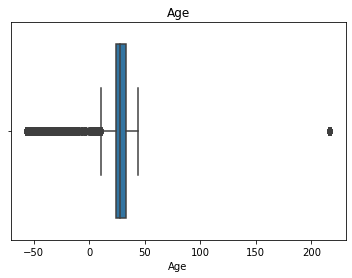

In [17]:
#displaying the outliers

import seaborn as sns
sns.boxplot(bank['Age']).set_title('Age')

In [18]:
#enumerate str columns for correlation matrix

num_bank = bank

for col_name in num_bank.columns:
    if(num_bank[col_name].dtype == 'object'):
        num_bank[col_name] = num_bank[col_name].astype('category')
        num_bank[col_name] = num_bank[col_name].cat.codes

In [19]:
#export table as csv 

bank.to_csv('bank_csv_file.csv', index = False)